Alunos:
  - Fabiane Sorbar
  - Vinicius Tessele   


---
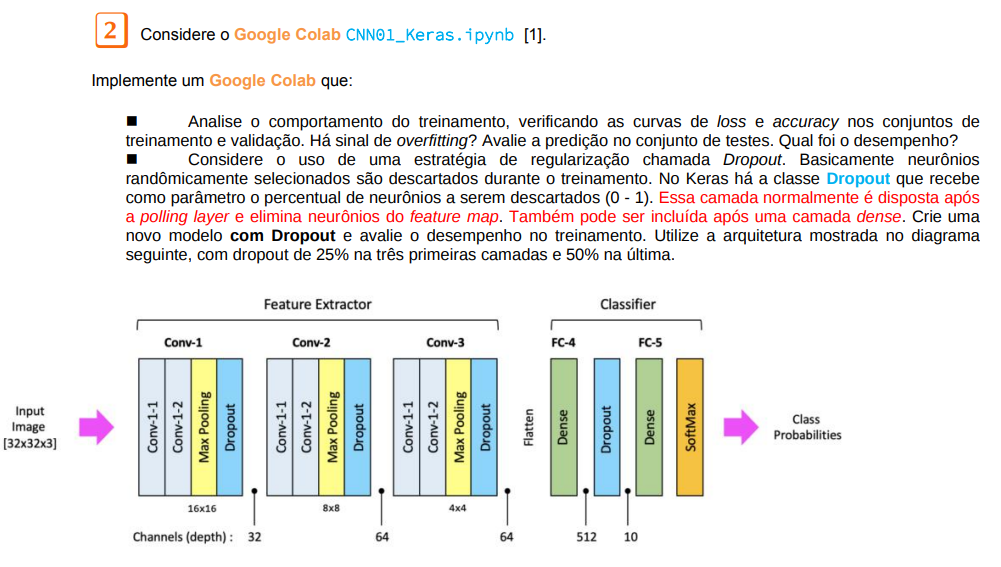

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.utils import to_categorical

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [2]:
def criarModelo(input_shape=(32, 32, 3), num_classes=10):
    global model
    kernel = (3, 3)
    pool = (2, 2)

    model = keras.models.Sequential([
        keras.Input(shape=input_shape),

        # Conv Block 1
        keras.layers.Conv2D(32, kernel, padding='same', activation='relu'),
        keras.layers.Conv2D(32, kernel, padding='same', activation='relu'),
        keras.layers.MaxPooling2D(pool_size=pool),  # Apenas 1ª pooling
        keras.layers.Dropout(0.25),

        # Conv Block 2
        keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
        keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
        keras.layers.MaxPooling2D(pool_size=pool),  # 2ª e última pooling
        keras.layers.Dropout(0.25),

        # Conv Block 3
        keras.layers.Conv2D(128, kernel, padding='same', activation='relu'),
        keras.layers.Conv2D(128, kernel, padding='same', activation='relu'),
        keras.layers.Dropout(0.25),

        # Classifier
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation='relu'),   # FC-4
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation='softmax')  # FC-5
    ])

def treinar(numEpocas):
  history = model.fit(x_train, y_train,
                      epochs=numEpocas,
                      batch_size=64,
                      validation_split=0.2)
  return history


def compilarModelo(otimizador):
  model.compile(optimizer= otimizador,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


def plotarMatrizDeConfusao(nome, X_novos, y_novos, class_names):
  print(f'Gerando matriz de confusão {nome}...\n')

  y_proba = model.predict(X_novos)
  y_pred = np.argmax(y_proba, axis=1)

  matriz_confusao = confusion_matrix(y_novos, y_pred)

  plt.figure(figsize=(10, 8))
  sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
              xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Classe Predita')
  plt.ylabel('Classe Verdadeira')
  plt.title(f'Matriz de Confusão - {nome}')
  plt.tight_layout()
  plt.show()
  return

def plotarCurvaDeAcuracia(history):
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.show()
  return

def avaliarConjuntoTestesDesconhecido(nome_modelo):
  resultado = model.evaluate(x_test, y_test)
  print(f"{nome_modelo} - Loss: {resultado[0]:.4f}, Acurácia: {resultado[1]:.4f}")
  return resultado

Dataset shape: (50000, 32, 32, 3)
First instance shape: (32, 32, 3)

First instance:
 [[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.

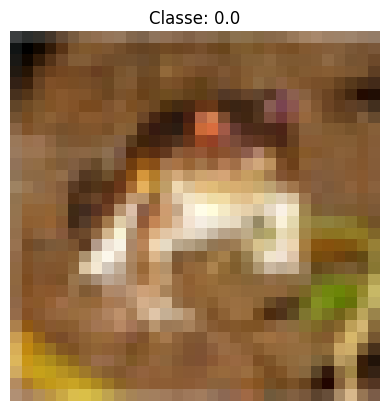

In [3]:
print(f'Dataset shape: {x_train.shape}')
print(f'First instance shape: {x_train[0].shape}')
print(f'\nFirst instance:\n {x_train[0]}')

import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.title(f"Classe: {y_train[0][0]}")
plt.axis('off')
plt.show()

Class name of first instance: frog


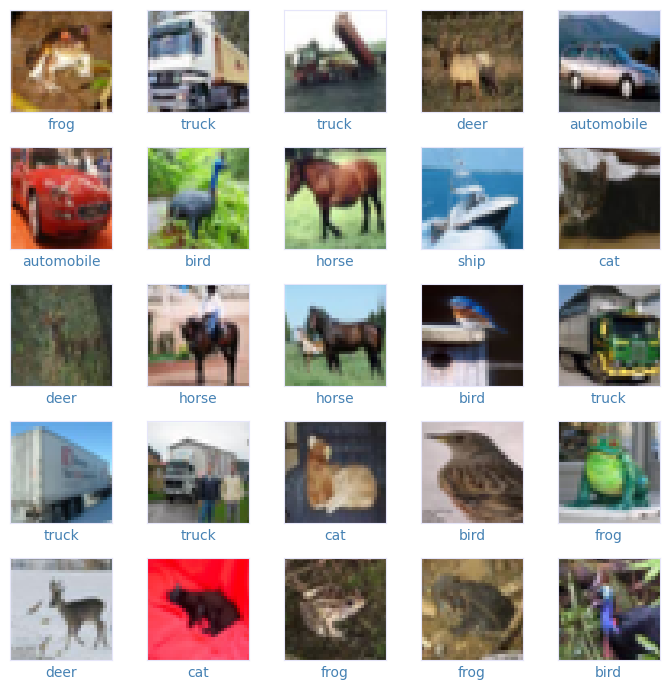

In [4]:
print(f'Class name of first instance: {class_names[np.argmax(y_train[0])]}')

plt.rc('axes', edgecolor='lavender')
fig = plt.figure(figsize=(7, 7))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[np.argmax(y_train[i])], color='steelblue')

plt.tight_layout()
plt.show()

In [5]:
optimizers = {
    "sgd": keras.optimizers.SGD(),
    "adam": keras.optimizers.Adam(),
    "rmsprop": keras.optimizers.RMSprop(),
    "nadam": keras.optimizers.Nadam()
}

model_builders = {
    "Base": criarModelo,
}

results = []

for model_name, build_fn in model_builders.items():
    for opt_name, opt in optimizers.items():
        print(f"\n🚧 Treinando Modelo '{model_name}' com Otimizador '{opt_name.upper()}'")
        build_fn()
        compilarModelo(opt_name)

        history = treinar(30)
        loss, acc = avaliarConjuntoTestesDesconhecido(f"{model_name} + {opt_name.upper()}")

        results.append({
            "Modelo": model_name,
            "Otimizador": opt_name.upper(),
            "Loss final": loss,
            "Acurácia final": acc,
            "Histórico": history
        })


🚧 Treinando Modelo 'Base' com Otimizador 'SGD'
Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.1198 - loss: 2.2884 - val_accuracy: 0.2629 - val_loss: 2.0579
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2454 - loss: 2.0640 - val_accuracy: 0.3006 - val_loss: 1.9465
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2974 - loss: 1.9349 - val_accuracy: 0.3694 - val_loss: 1.7839
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3423 - loss: 1.8242 - val_accuracy: 0.3901 - val_loss: 1.7006
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3799 - loss: 1.7310 - val_accuracy: 0.4123 - val_loss: 1.6378
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3989 - loss: 1.6716 - val_accuracy: 0.4468 - val_loss: 1.5443
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4213 - loss: 1.6004 - val_accuracy: 0.4651 - val_loss: 1.4957
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - 


📊 Comparativo de Acurácia Final:
  Modelo Otimizador  Loss final  Acurácia final
3   Base      NADAM    0.757516          0.8003
1   Base       ADAM    0.738119          0.7899
2   Base    RMSPROP    0.797035          0.7532
0   Base        SGD    0.883465          0.6868


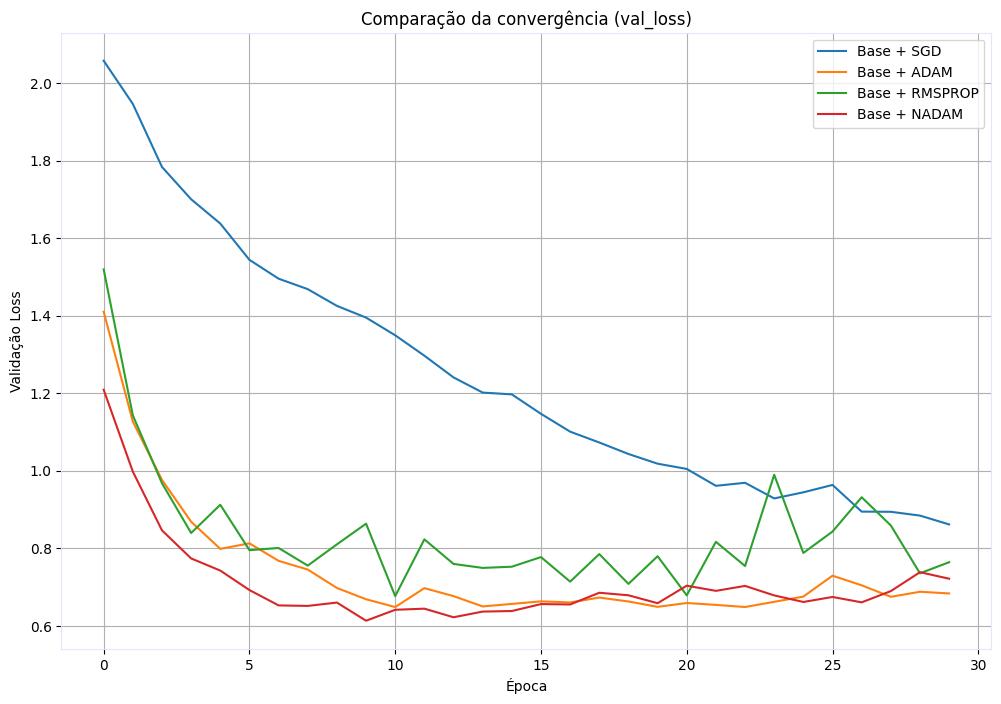

In [6]:
df_resultados = pd.DataFrame(results).drop(columns=['Histórico'])
print("\n📊 Comparativo de Acurácia Final:")
print(df_resultados.sort_values(by="Acurácia final", ascending=False))

# Plot da validação loss
plt.figure(figsize=(12, 8))
for r in results:
    label = f"{r['Modelo']} + {r['Otimizador']}"
    plt.plot(r["Histórico"].history["val_loss"], label=label)
plt.xlabel("Época")
plt.ylabel("Validação Loss")
plt.title("Comparação da convergência (val_loss)")
plt.legend()
plt.grid(True)
plt.show()


No teste o otimizador NADAM obteve a melhor acurácia final (80,03%), superando os demais otimizadores mesmo com um loss ligeiramente superior ao do ADAM.

O ADAM apresentou o menor loss (0.7381) e uma acurácia (78,99%), mostrando-se também bastante eficaz.

RMSPROP teve desempenho intermediário, com perda mais alta (0.7970) e queda perceptível na acurácia (75,32%).

O SGD, sem técnicas adaptativas, teve o pior desempenho, com o maior loss (0.8835) e menor acurácia (68,68%).

In [7]:
optimizers = {
    "sgd": keras.optimizers.SGD(),
    "adam": keras.optimizers.Adam(),
    "rmsprop": keras.optimizers.RMSprop(),
    "nadam": keras.optimizers.Nadam()
}

model_builders = {
    "Base": criarModelo,
}

results = []

for model_name, build_fn in model_builders.items():
    for opt_name, opt in optimizers.items():
        print(f"\n🚧 Treinando Modelo '{model_name}' com Otimizador '{opt_name.upper()}'")
        build_fn()
        compilarModelo(opt_name)

        history = treinar(60)
        loss, acc = avaliarConjuntoTestesDesconhecido(f"{model_name} + {opt_name.upper()}")

        results.append({
            "Modelo": model_name,
            "Otimizador": opt_name.upper(),
            "Loss final": loss,
            "Acurácia final": acc,
            "Histórico": history
        })


🚧 Treinando Modelo 'Base' com Otimizador 'SGD'
Epoch 1/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1214 - loss: 2.2871 - val_accuracy: 0.2489 - val_loss: 2.0849
Epoch 2/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2411 - loss: 2.0758 - val_accuracy: 0.2663 - val_loss: 2.0502
Epoch 3/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2865 - loss: 1.9625 - val_accuracy: 0.3462 - val_loss: 1.8370
Epoch 4/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3349 - loss: 1.8460 - val_accuracy: 0.3997 - val_loss: 1.6919
Epoch 5/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3724 - loss: 1.7479 - val_accuracy: 0.4190 - val_loss: 1.6338
Epoch 6/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3972 - loss: 1.6667 - val_accuracy: 0.4399 - val_loss: 1.5576
Epoch 7/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4219 - loss: 1.5980 - val_accuracy: 0.4607 - val_loss: 1.4940
Epoch 8/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - 


📊 Comparativo de Acurácia Final:
  Modelo Otimizador  Loss final  Acurácia final
3   Base      NADAM    0.835623          0.8115
1   Base       ADAM    0.835355          0.7914
0   Base        SGD    0.674557          0.7724
2   Base    RMSPROP    0.811386          0.7455


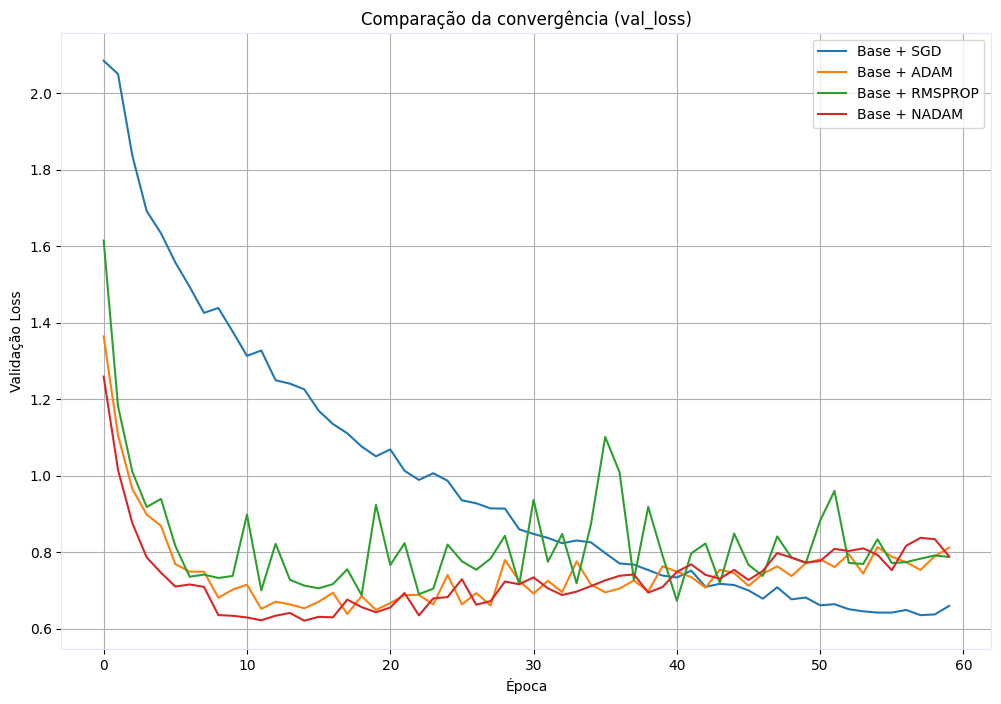

In [8]:
df_resultados = pd.DataFrame(results).drop(columns=['Histórico'])
print("\n📊 Comparativo de Acurácia Final:")
print(df_resultados.sort_values(by="Acurácia final", ascending=False))

# Plot da validação loss
plt.figure(figsize=(12, 8))
for r in results:
    label = f"{r['Modelo']} + {r['Otimizador']}"
    plt.plot(r["Histórico"].history["val_loss"], label=label)
plt.xlabel("Época")
plt.ylabel("Validação Loss")
plt.title("Comparação da convergência (val_loss)")
plt.legend()
plt.grid(True)
plt.show()


NADAM apresentou a melhor acurácia final (81,15%), superando ligeiramente o ADAM, embora com um loss final praticamente igual ao do ADAM.

ADAM teve uma acurácia um pouco inferior (79,14%), mas com loss final quase idêntico ao do NADAM.

SGD, mesmo com um loss final mais baixo (0.674) que todos os outros, apresentou uma acurácia menor (77,24%). Isso pode indicar overfitting.

RMSPROP teve o pior desempenho em acurácia (74,55%), apesar de um loss razoável.


# 📊 Comparativo de Acurácia Final — 30 vs 60 Épocas

### ✅ 30 Épocas

| Modelo | Otimizador | Loss Final | Acurácia Final |
|--------|-------------|------------|----------------|
| 3      | NADAM       | 0.757516   | 0.8003         |
| 1      | ADAM        | 0.738119   | 0.7899         |
| 2      | RMSPROP     | 0.797035   | 0.7532         |
| 0      | SGD         | 0.883465   | 0.6868         |

### ✅ 60 Épocas

| Modelo | Otimizador | Loss Final | Acurácia Final |
|--------|-------------|------------|----------------|
| 3      | NADAM       | 0.835623   | 0.8115         |
| 1      | ADAM        | 0.835355   | 0.7914         |
| 0      | SGD         | 0.674557   | 0.7724         |
| 2      | RMSPROP     | 0.811386   | 0.7455         |

---

## 📈 Comparativo Evolutivo

| Otimizador | Épocas | Loss Final | Acurácia Final | Δ Acurácia | Δ Loss     |
|------------|--------|------------|----------------|------------|------------|
| **NADAM**  | 30 → 60| 0.7575 → 0.8356 | 0.8003 → 0.8115 | **+0.0112** | +0.0781 |
| **ADAM**   | 30 → 60| 0.7381 → 0.8354 | 0.7899 → 0.7914 | **+0.0015** | +0.0972 |
| **SGD**    | 30 → 60| 0.8835 → 0.6746 | 0.6868 → 0.7724 | **+0.0856** | **–0.209** |
| **RMSPROP**| 30 → 60| 0.7970 → 0.8114 | 0.7532 → 0.7455 | **–0.0077** | +0.0143 |

---
## 🔍 Análise

- **NADAM** foi o melhor otimizador geral, com a maior acurácia final em ambas as fases e leve melhora com mais épocas.
- **ADAM** teve desempenho estável.
- **SGD** apresentou a **melhor evolução**, ganhando 8,5 pontos percentuais de acurácia e reduzindo significativamente o loss — mostrando que precisa de mais épocas para convergir.
- **RMSPROP** foi o único que **piorou** com o tempo, indicando possível overfitting ou má adaptação ao problema.

---